### New to Train

In [ ]:
from keras.models import *
from keras.layers import *
from keras.applications import ResNet50
from keras.preprocessing.image import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint


import numpy as np
import os

np.random.seed(2017)

from skimage.io import imread_collection, imread
from skimage.transform import resize

filepath='../every.resn50.hdf5'
img_width, img_height = 243, 243

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'

nb_train_samples = 5106
nb_validation_samples = 1355
epochs = 50
batch_size = 16

if __name__ == '__main__':
        
    base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg'
                       ,input_tensor=Input((img_width, img_height, 3)))
    # -  https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
    # -  https://keras.io/zh/layers/core/
    for layer in base_model.layers:
        layer.trainable = False
        
    #x = Flatten()(base_model.output)#将输入展平。不影响批量大小。
    x = Dropout(0.5)(base_model.output) # this line shoule  be the first line!  // 0.5  is better then 0.2
    x = Dense(2, activation='softmax', name='fc2')(base_model.output) #加入神經元(隱藏層) 2,foftmax

    model = Model(base_model.input, x)
  
    for layer in model.layers[140:]:
        layer.trainable = True


    train_path ='../dataset/training_set/smo'
    test_path = '../dataset/test_set/smo'

    ''' 
    Optimizers which is simple yet very efficient approach to discriminative learning 
    of linear classifiers under convex loss functions such as (linear) Support
    Vector Machines and Logistic Regression
    #### some type optomizer:#   https://keras.io/optimizers/#adadelta
    '''
    #optiz = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
    optiz = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0) #https://keras.io/optimizers/#adadelta
    
    model.compile(optimizer=optiz,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # # X_train, y_train, X_val, y_val = train_test_split(X, y, test_size=0.1)
    # model.fit(X, y, batch_size=32, epochs=15, validation_split=0.1)

    data_gen = ImageDataGenerator()
   

In [ ]:
train_data_gen = data_gen.flow_from_directory(train_path, (img_width, img_height), shuffle='False', batch_size=32)
val_data_gen = data_gen.flow_from_directory(test_path, (img_width, img_height), shuffle='False', batch_size=32)
model.summary()

#model = load_model('../fine_tuning_dogcat_resnet50')


### if do not train ~Skip this!

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit_generator(train_data_gen, steps_per_epoch=nb_train_samples, epochs=epochs, validation_data=val_data_gen, validation_steps=nb_validation_samples,  callbacks=callbacks_list)


### Demo Start

In [5]:
from keras.models import *
from keras.layers import *
from keras.applications import ResNet50
from keras.preprocessing.image import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint


import numpy as np
import os

np.random.seed(2017)

from skimage.io import imread_collection, imread
from skimage.transform import resize

filepath='../every.resn50.hdf5'
img_width, img_height = 243, 243

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'

nb_train_samples = 5106
nb_validation_samples = 1355
epochs = 50
batch_size = 16

import os
from shutil import copyfile

## load moduld o

model = load_model('../every.resn50.94096.hdf5')
#copyfile('../every.resn50.hdf5', '../every.resn50.94096.hdf5')

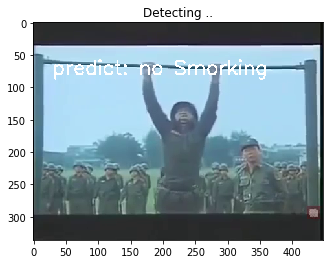

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import pandas as pd

import os
import cv2
import time
from matplotlib import pyplot as plt
import glob
from io import BytesIO
import PIL
from IPython.display import display, Image

################################################################################    
# Import the required modules
%pylab inline 
import cv2
from IPython.display import clear_output

# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("../dataset/source/smorking.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
#plt.figure(figsize = (10,10))
#fig = plt.figure()
#print ("fig = ") 
#<Figure size 432x288 with 0 Axes>
label_no_smorking = "predict: no Smorking"
label_smorking = "predict: Smorking!"
count = 0

#'''
try:
    while(True):
        #''' Capture frame-by-frame '''
        ret, frame = vid.read()
        
        #''' with biger image size comes slower playing show!  '''
        #plt.figure(1,figsize=(10,5))
        
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
            
        #''' Write image to folder'''
        #img_jpg = np.asarray(frame)
        #cv2.imwrite("../dataset/source/out/cyril_frame%d.jpg" % count, img_jpg)
        #count = count + 1
        
        #predict image here !
        resize = cv2.resize(frame, (img_width, img_height)) 
        resize = np.asarray(resize)
        test_image = image.img_to_array(resize)
        inputarray = test_image[np.newaxis,...] # dimension added to fit input size
        result =  model.predict(inputarray)
        #print(result)
        #print("Predicted=%s", result)
        ans = result[0][1]
        
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        
        if ans > 0.45: 
        
            # put text into image 
            # https://blog.csdn.net/GAN_player/article/details/78155283
            cv2.putText(frame, label_smorking, (30, 80),  cv2.FONT_HERSHEY_SIMPLEX,1.0, (255,0, 0), 2)
            #cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
            cv2.line(frame, (0, 0), (432, 0),     (255,0,0),  12)
            cv2.line(frame, (0, 0), (0, 350),     (255,0,0),  12)
            cv2.line(frame, (440, 0),(440, 440),  (255,0,0),  12)
            cv2.line(frame, (0, 330),(440, 330),(255,0,0),12)

        else:
             # put text into image 
            # https://blog.csdn.net/GAN_player/article/details/78155283
            cv2.putText(frame, label_no_smorking, (30, 80),  cv2.FONT_HERSHEY_SIMPLEX,1.0, (255,255, 255), 2)
            #cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
        
        # Turn off the axis
        #plt.axis('off')

        # plt.figure(figsize=(8, 1),)
        # Title of the window
        plt.title("Detecting ..")
        # Display the frame
        plt.imshow(frame)
        plt.show()
        # Display the frame until new frame is available
        clear_output(wait=True)
                
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    #print("Released Video Resource")
    

In [ ]:
result.shape

### Get predicted Picture from video frame  

In [ ]:
from matplotlib import pyplot as plt
import glob
import numpy as np
import os.path as path
from scipy import misc
import os
import cv2
import time
from keras.preprocessing import image
from io import BytesIO
import PIL
from IPython.display import display, Image


video_data_dir = '../dataset/source/smorking.mp4'
#-------------------------------------------------------------------
vidcap = cv2.VideoCapture(video_data_dir)
#-------------------------------------------------------------------
video_fps= int(vidcap.get(cv2.CAP_PROP_FPS))
print ("CAP_PROP_FPS= ",video_fps)
#-------------------------------------------------------------------
#video_pos = int(vidcap.get(cv2.CAP_PROP_POS_MSEC))
#print ("CAP_PROP_POS_MSEC= ",video_pos)
#-------------------------------------------------------------------
video_w = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
print ("CAP_PROP_FRAME_WIDTH= ",video_w)
#-------------------------------------------------------------------
video_h = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print ("CAP_PROP_FRAME_HEIGHT= ",video_h)
#-------------------------------------------------------------------
video_total_frame = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print ("video_total_frame (CAP_PROP_FRAME_COUNT) = ",video_total_frame)
#-------------------------------------------------------------------
video_total_tims=  video_total_frame / video_fps
print ("video_total_frame = ",video_total_tims)
video_total_tims_msec = video_total_tims * 1000
print ("video_total_tims_msec = ",video_total_tims_msec)
#-------------------------------------------------------------------
#video_total_times = int(vidcap.get(cv2.CAP_PROP_POS_MSEC))
#print ("CV_CAP_PROP_POS_MSEC = ",video_total_times)


msec_count = 0

while msec_count <= video_total_tims_msec:

    vidcap.set(cv2.CAP_PROP_POS_MSEC, msec_count) 
    success,imagecv2 = vidcap.read()
    resize = cv2.resize(imagecv2, (img_width, img_height)) 
    test_image = image.img_to_array(resize)
    test_image_expand_dims = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image_expand_dims)
    ans = result[0][1]
    #print(ans)
    
    #save image here
    #img_jpg = np.asarray(resize)    
    #cv2.imwrite("../dataset/tmp/frame%d.jpg" % msec_count, img_jpg)
  
    if ans > 0.45 :
        
        #convert RGB of image for IPL
        frame = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB) ### for IPL.show!!!

        print ("smorking---------------")
        #plt.imshow(img)
        im = PIL.Image.fromarray(frame)
        bio = BytesIO()
        im.save(bio, format='png')
        display(Image(bio.getvalue(), format='png'))        
    
    else :
        
        print ("no smorking here ---------------")
        '''
        #convert RGB of image for IPL
        frame = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB) ### for IPL.show!!!

        print ("no smorking---------------")
        #plt.imshow(img)
        im = PIL.Image.fromarray(frame)
        bio = BytesIO()
        im.save(bio, format='png')
        display(Image(bio.getvalue(), format='png'))  
        '''
        print ("-------------------------------------------------")

    msec_count = msec_count + (2000)


print ( "done, counts are", msec_count)


## my cat

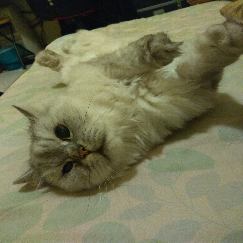

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../dataset/single_prediction/mama.jpg', target_size= (img_width,img_height))
test_image

In [17]:
test_image_expand_dims = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image_expand_dims)
ans = result[0][1]
print(ans)

0.00040641945


## Cyril is smorking

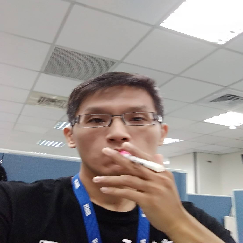

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../dataset/single_prediction/smo/cyrils1.jpg', target_size= (img_width,img_height))
test_image

In [19]:
test_image_expand_dims = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image_expand_dims)
ans = result[0][1]
print(ans)

1.0


## moviepy demo

In [ ]:
from moviepy.editor import * # imports everything, quick and dirty
import moviepy.editor as mpy # Clean. Then use mpy.VideoClip, etc.
from moviepy.editor import VideoFileClip # just import what you need
from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.video.fx.resize import resize


clip = VideoFileClip("../dataset/source/smorking.mp4").rotate(0)
print( clip.duration )
clip.ipython_display(maxduration=666)